# Churn Case Study

## Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]


<img src="https://images.pexels.com/photos/3078/home-dialer-siemens-telephone.jpg?auto=compress&cs=tinysrgb&dpr=2&h=750&w=1260" style="width:400px">

**Client**: Telco Company in the USA offering triple play (phone, internet and TV).

New competitor entered offering triple play, resulting in increased churn.

Want better way to spot potential churning customers and suggested actions what to do.

## **Assignment**

- Define the business problem
- Determine which evaluation metric you find appropriate:
   - accuracy
   - precision
   - recall
   - f1 score
- Determine which type of slice/segment/type of churn you are interested
- Run "data prep code"
- Use logistic regression to create 2-3 model specifications
  - model 1 (vanilla model): uses cleaned data as is, find best cutoff using chosen metric
  - model 2: create at least **2 new features** and add them to the model
  - model 3 (if time, a 'reach' model): increase the LASSO penalty to decrease the feature set
- Pick the "best" model and find the "best" threshold
- Use "best" model to identify the drivers of churn in your segment analysis and make recommendations for the company
- Each group will have 5 minutes to present their recommendations to the rest of the class. Make sure to share:
   - segment you chose
   - evaluation metric you chose based on the business problem
   - evaluation metric of "best" model's threshold & threshold
   - what drives churn and what are your recommendations
   - **if you had more time** what would you work on?

## Data

<img src="https://images.pexels.com/photos/53621/calculator-calculation-insurance-finance-53621.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=750&w=1260" style = "width:400px" >
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information 
     - how long they’ve been a customer (tenure is in months)
     - contract, payment method, paperless billing, monthly charges, and total charges
     - all "totals" are over the length of the contract
- Demographic info about customers – gender, age range, and if they have partners and dependents
- Usage
    - information about their usage patterns
    - again, usage totals are over length of contract

## Concept: Churn

#### Type of churn:

**Voluntary** – they left after contract was up

**Involuntary** – we fired them

**Early churn** – left early, broke contract

### Churn is a survival problem:
- Predicting who will churn next month is really hard
- Predicting who may churn over next 3 months is easier

<img src = "./img/funnel.png" style="width:800px">

There are many reasons to churn &#8594; **feature engineering is king**

### Solutions need to be tied to root problems

<img src = "./img/solution.png" style="width:800px">

### Different solutions have different time frames

<img src = "./img/time.png" style="width:800px">

## Remember:

#### You will not be paid to create intricate models
### You will be paid to **Solve Problems**

# Get Started!

## Part 1: Business problem

#### End Users:

- Our client, TelCo, C-Suite


#### True business problem:

- Create a model that can, if given data from Telco's customer data, predict if a customer will churn in the first three months of their tenure. 

#### Context:

- **False negative** 
    - We predict a customer will stay but they churn.
        - Outcome: We have fewer customers than we anticipate. 
- **False positive**
    - We predict a customer will churn but they stay. 
        - Outcome: We have more customers than we anticipate. 

## Part 2: Evaluation Metric
Which metric (of the ones we've explore so far) would make sense to primarily use as we evaluate our models?

- Accuracy
- Precision
- **Recall We want to optimize for Recall because it will minimize false negatives.**
- F1-Score

## Part 3: Segment choice

What type slice/segment/type of churn you are interested in?
- We are interested in early churn 


## Part 4: Data Prep Code

In [10]:
# Import pacakges
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Load dataset
url_link = 'https://docs.google.com/spreadsheets/d/1TAWfdKnWYiCzKUeDyGL6NzIOv7AxFt_Sfzzax464_FQ/export?format=csv&gid=882919979'
telco = pd.read_csv(url_link)

# Drop nas
telco.dropna(inplace=True)

# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(telco.drop(columns=['customerID','Churn']), np.where(telco.Churn =="Yes", 1, 0), test_size=0.33, random_state=42)

# Separate out numeric from categorical variables
cat_var = telco.select_dtypes(include='object')
cat_var.drop(columns=['customerID','Churn'], inplace = True)

num_var = telco.select_dtypes(exclude = 'object') 

# Encode categorical variables
ohc = OneHotEncoder(drop='first')
encoded_cat = ohc.fit_transform(X_train[cat_var.columns.tolist()]).toarray()

# Add feature names to encoded vars
encoded=pd.DataFrame(encoded_cat, columns=ohc.get_feature_names(cat_var.columns.tolist()))
encoded.reset_index(inplace=True, drop=True)
X_train.reset_index(inplace=True, drop=True)

# Reassemble entire training dataset
clean_X_train = pd.concat([X_train[num_var.columns.tolist()] , encoded], axis=1,  sort=False)
clean_X_train.shape

encoded_cat = ohc.transform(X_test[cat_var.columns.tolist()]).toarray()
# Add feature names to encoded vars
encoded=pd.DataFrame(encoded_cat, columns=ohc.get_feature_names(cat_var.columns.tolist()))
encoded.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
# Reassemble entire training dataset
clean_X_test = pd.concat([X_test[num_var.columns.tolist()] , encoded], axis=1,  sort=False)

/Users/carmimedoff/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
clean_X_train.columns

Index(['SeniorCitizen', 'tenure', 'NumbervMailMessages', 'TotalDayMinutes',
       'TotalDayCalls', 'TotalEveMinutes', 'TotalEveCalls',
       'TotalNightMinutes', 'TotalNightCalls', 'TotalIntlMinutes',
       'TotalIntlCalls', 'CustomerServiceCalls', 'TotalCall',
       'TotalHighBandwidthMinutes', 'TotalHighLatencyMinutes', 'TotalRevenue',
       'gender_Male', 'MaritalStatus_Yes', 'Dependents_Yes',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
 

In [12]:
clean_X_train

,SeniorCitizen,tenure,NumbervMailMessages,TotalDayMinutes,TotalDayCalls,TotalEveMinutes,TotalEveCalls,TotalNightMinutes,TotalNightCalls,TotalIntlMinutes,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternationalPlan_Yes,VoiceMailPlan_Yes
0,0,1,0,97.2,88,155.6,85,261.6,105,12.4,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,58,34,138.8,80,142.0,108,183.8,77,11.8,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0,1,0,179.7,128,299.8,92,185.3,120,7.6,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0,4,0,298.4,78,270.5,142,107.3,84,12.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0,1,0,189.3,77,155.9,128,186.0,83,7.4,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2224,0,3,26,170.5,107,217.2,77,225.7,71,13.6,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2225,0,35,0,129.4,97,185.4,101,204.7,106,1.1,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2226,0,24,0,81.9,75,253.8,114,213.1,125,8.9,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2227,0,64,37,163.5,77,203.1,102,232.0,87,7.8,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


## Part 5: Create models

### VANILLA

In [23]:
import pandas as pd
import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [24]:
ss = StandardScaler()

In [25]:
logreg = LogisticRegression()

In [26]:
X_train_scaled = ss.fit_transform(X_train[num_var.columns.tolist()])
X_test_scaled = ss.transform(X_test[num_var.columns.tolist()])

In [27]:
logreg.fit(X_train_scaled,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
y_pred_train = logreg.predict(X_train_scaled)
y_pred_test = logreg.predict(X_test_scaled)

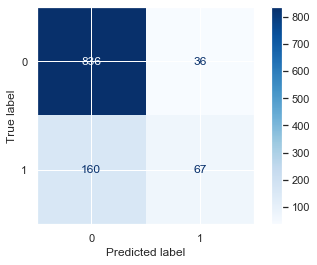

In [29]:
plot_confusion_matrix(logreg, X_test_scaled,y_test,cmap=plt.cm.Blues, # Changing the color scheme
                      values_format=".3g")

In [30]:
metrics = {"Accuracy": accuracy_score,
           "Recall": recall_score,
           "Precision": precision_score,
           "F1-Score": f1_score}

for name, metric_function in metrics.items():
    print(f"{name}:"); print("="*len(name))
    print(f"TRAIN: {metric_function(y_train,y_pred_train):.4f}")
    print(f"TEST: {metric_function(y_test, y_pred_test):.4f}")
    print("*" * 15)

Accuracy:
TRAIN: 0.8412
TEST: 0.8217
***************
Recall:
TRAIN: 0.3099
TEST: 0.2952
***************
Precision:
TRAIN: 0.6875
TEST: 0.6505
***************
F1-Score:
TRAIN: 0.4272
TEST: 0.4061
***************


**_-----------------------------------------_**

### + Balanced Class Weight

In [32]:
logreg = LogisticRegression(class_weight = 'balanced')

In [33]:
X_train_scaled = ss.fit_transform(X_train[num_var.columns.tolist()])
X_test_scaled = ss.transform(X_test[num_var.columns.tolist()])

In [34]:
logreg.fit(X_train_scaled,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
y_pred_train = logreg.predict(X_train_scaled)
y_pred_test = logreg.predict(X_test_scaled)

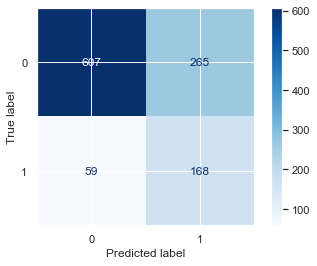

In [36]:
plot_confusion_matrix(logreg, X_test_scaled,y_test,cmap=plt.cm.Blues, # Changing the color scheme
                      values_format=".3g")

In [37]:
metrics = {"Accuracy": accuracy_score,
           "Recall": recall_score,
           "Precision": precision_score,
           "F1-Score": f1_score}

for name, metric_function in metrics.items():
    print(f"{name}:"); print("="*len(name))
    print(f"TRAIN: {metric_function(y_train,y_pred_train):.4f}")
    print(f"TEST: {metric_function(y_test, y_pred_test):.4f}")
    print("*" * 15)

Accuracy:
TRAIN: 0.7201
TEST: 0.7052
***************
Recall:
TRAIN: 0.7934
TEST: 0.7401
***************
Precision:
TRAIN: 0.3867
TEST: 0.3880
***************
F1-Score:
TRAIN: 0.5200
TEST: 0.5091
***************


**_-----------------------------------------_**

### Added columns

In [38]:
telco['BandwidthPerMonth'] = telco.TotalHighBandwidthMinutes/telco.tenure
telco['RevenuePerMonth'] = telco.TotalRevenue/telco.tenure

In [44]:
# Drop nas
telco.dropna(inplace=True)

# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(telco.drop(columns=['customerID','Churn']), np.where(telco.Churn =="Yes", 1, 0), test_size=0.33, random_state=42)

# Separate out numeric from categorical variables
cat_var = telco.select_dtypes(include='object')
cat_var.drop(columns=['customerID','Churn'], inplace = True)

num_var = telco.select_dtypes(exclude = 'object') 

# Encode categorical variables
ohc = OneHotEncoder(drop='first')
encoded_cat = ohc.fit_transform(X_train[cat_var.columns.tolist()]).toarray()

# Add feature names to encoded vars
encoded=pd.DataFrame(encoded_cat, columns=ohc.get_feature_names(cat_var.columns.tolist()))
encoded.reset_index(inplace=True, drop=True)
X_train.reset_index(inplace=True, drop=True)

# Reassemble entire training dataset
clean_X_train = pd.concat([X_train[num_var.columns.tolist()] , encoded], axis=1,  sort=False)
clean_X_train.shape

encoded_cat = ohc.transform(X_test[cat_var.columns.tolist()]).toarray()

# Add feature names to encoded vars
encoded=pd.DataFrame(encoded_cat, columns=ohc.get_feature_names(cat_var.columns.tolist()))
encoded.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)

# Reassemble entire training dataset
clean_X_test = pd.concat([X_test[num_var.columns.tolist()] , encoded], axis=1,  sort=False)

/Users/carmimedoff/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [45]:
ss = StandardScaler()

In [46]:
X_train_scaled = ss.fit_transform(X_train[num_var.columns.tolist()])
X_test_scaled = ss.transform(X_test[num_var.columns.tolist()])

In [47]:
logreg = LogisticRegression(class_weight = 'balanced')

logreg.fit(X_train_scaled, y_train)

train_preds = logreg.predict(X_train_scaled)
test_preds = logreg.predict(X_test_scaled)

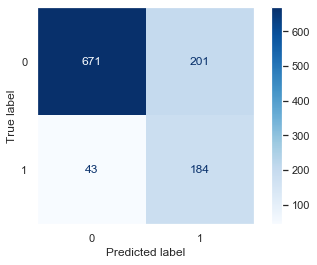

In [48]:
# Plotting the confusion matrix using SKLearn
plot_confusion_matrix(logreg, X_test_scaled, y_test,
                      cmap=plt.cm.Blues, # Changing the color scheme
                      values_format=".3g") # Formatting the numbers properly
plt.grid(False) # This just removes an annoying grid that shows up by default

plt.show()

In [49]:
# Printing the metrics nicely
metrics = {"Accuracy": accuracy_score,
           "Recall": recall_score,
           "Precision": precision_score,
           "F1-Score": f1_score}

for name, metric in metrics.items():
    print(f"{name}:"); print("="*len(name))
    print(f"TRAIN: {metric(y_train, train_preds):.4f}")
    print(f"TEST: {metric(y_test, test_preds):.4f}")
    print("*" * 15)

Accuracy:
TRAIN: 0.7779
TEST: 0.7780
***************
Recall:
TRAIN: 0.8052
TEST: 0.8106
***************
Precision:
TRAIN: 0.4543
TEST: 0.4779
***************
F1-Score:
TRAIN: 0.5809
TEST: 0.6013
***************


## Identify cut off

In [52]:
# Check Coefficients
coef_dict = {}
for coef, feat in zip(list(logreg.coef_[0]),clean_X_train.columns.tolist()):
    coef_dict[feat] = coef
    
# Convert to dataframe so you can sort it
coef_df = pd.DataFrame.from_dict(coef_dict, columns =['Coef'], orient='index')
coef_df.sort_values(by=['Coef'], ascending = False)

,Coef
RevenuePerMonth,1.338197
CustomerServiceCalls,0.437354
TotalDayMinutes,0.434464
TotalHighLatencyMinutes,0.293493
BandwidthPerMonth,0.254599
TotalRevenue,0.223791
TotalIntlMinutes,0.212325
TotalNightMinutes,0.171210
TotalEveMinutes,0.151465
SeniorCitizen,0.107585


In [39]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
imp = SimpleImputer(missing_values=np.nan, strategy='median')
mscale = MaxAbsScaler()

prep = [('imputer', imp), ('scaler', mscale)]

pipe = Pipeline(prep)

In [40]:
pipe.fit(clean_X_train)

Pipeline(memory=None,
         steps=[('imputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='median',
                               verbose=0)),
                ('scaler', MaxAbsScaler(copy=True))],
         verbose=False)

In [41]:
X_train_prepped = pipe.transform(clean_X_train)

In [42]:
# Transform X_test
X_test_transformed = pipe.transform(clean_X_test)

# Get probabilites
y_test_pred_probs = logreg.predict_proba(X_test_transformed)[:, 1]

ValueError: X has 42 features per sample; expecting 16

In [28]:
y_train_pred_probs = logreg.predict_proba(clean_X_train[num_var.columns.tolist()])[:, 1]

## Part 6: Pick model & find best threshold

In [101]:
clean_X_train

,SeniorCitizen,tenure,NumbervMailMessages,TotalDayMinutes,TotalDayCalls,TotalEveMinutes,TotalEveCalls,TotalNightMinutes,TotalNightCalls,TotalIntlMinutes,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternationalPlan_Yes,VoiceMailPlan_Yes
0,0,1,0,97.2,88,155.6,85,261.6,105,12.4,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,58,34,138.8,80,142.0,108,183.8,77,11.8,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0,1,0,179.7,128,299.8,92,185.3,120,7.6,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0,4,0,298.4,78,270.5,142,107.3,84,12.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0,1,0,189.3,77,155.9,128,186.0,83,7.4,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2224,0,3,26,170.5,107,217.2,77,225.7,71,13.6,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2225,0,35,0,129.4,97,185.4,101,204.7,106,1.1,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2226,0,24,0,81.9,75,253.8,114,213.1,125,8.9,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2227,0,64,37,163.5,77,203.1,102,232.0,87,7.8,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [107]:
len(clean_X_train.columns)

42

In [116]:
clean_X_train.iloc[:,1]

0        1
1       58
2        1
3        4
4        1
        ..
2224     3
2225    35
2226    24
2227    64
2228    61
Name: tenure, Length: 2229, dtype: int64

In [117]:
r = []
for i in range(len(clean_X_train.columns)):
    if i < len(clean_X_train.columns):
        new_df = clean_X_train
        new_df_test = clean_X_test
        new_df['interaction']=new_df.iloc[:,i]*new_df.iloc[:,i+1]
        new_df_test['interaction']=new_df_test.iloc[:,i]*new_df_test.iloc[:,i+1]
        logreg.fit(new_df,y_train)
        y_pred_train = logreg.predict(new_df)
        y_pred_test = logreg.predict(new_df_test)
        r_score = recall_score(y_train,y_pred_train)
        r.append(r_score)
    else:
        break

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [118]:
r

[0.27699530516431925,
 0.24413145539906103,
 0.2511737089201878,
 0.26291079812206575,
 0.14084507042253522,
 0.19953051643192488,
 0.2746478873239437,
 0.19248826291079812,
 0.284037558685446,
 0.2652582159624413,
 0.2605633802816901,
 0.30985915492957744,
 0.11502347417840375,
 0.11971830985915492,
 0.09859154929577464,
 0.26291079812206575,
 0.24882629107981222,
 0.22535211267605634,
 0.26291079812206575,
 0.24647887323943662,
 0.23708920187793428,
 0.2652582159624413,
 0.23708920187793428,
 0.23708920187793428,
 0.23708920187793428,
 0.23708920187793428,
 0.23708920187793428,
 0.23708920187793428,
 0.23708920187793428,
 0.23708920187793428,
 0.23708920187793428,
 0.23708920187793428,
 0.23708920187793428,
 0.24413145539906103,
 0.23708920187793428,
 0.24178403755868544,
 0.3028169014084507,
 0.23708920187793428,
 0.23708920187793428,
 0.2746478873239437,
 0.24882629107981222,
 0.24882629107981222]

In [108]:
r = []
for i in range(len(clean_X_train.columns)):
    pf = PolynomialFeatures(degree=2,interaction_only=True)
    if i < len(clean_X_train):
        new_var = clean_X_train.iloc[:,i:i+1]
        new_var_test = clean_X_test.iloc[:,i:i+1]
        pf_data=pf.fit_transform(new_var)
        pf_data_test=pf.transform(new_var_test)
        new_col=clean_X_train.drop(clean_X_train.iloc[:,i:i+1],axis=1)
        new_col_test= clean_X_test.drop(clean_X_test.iloc[:,i:i+1],axis=1)
        new_df = pd.concat([new_col,new_var],axis=1)
        new_df_test = pd.concat([new_col_test,new_var_test],axis=1)
        logreg.fit(new_df,y_train)
        y_pred_train = logreg.predict(new_df)
        y_pred_test = logreg.predict(new_df_test)
        r_score = recall_score(y_train,y_pred_train)
        r.append(r_score)
    else:
        break

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [109]:
r

[0.23708920187793428,
 0.23708920187793428,
 0.23708920187793428,
 0.23708920187793428,
 0.23708920187793428,
 0.23708920187793428,
 0.23708920187793428,
 0.23708920187793428,
 0.23708920187793428,
 0.23708920187793428,
 0.23708920187793428,
 0.23708920187793428,
 0.23708920187793428,
 0.23708920187793428,
 0.23708920187793428,
 0.23708920187793428,
 0.23708920187793428,
 0.23708920187793428,
 0.23708920187793428,
 0.23708920187793428,
 0.23708920187793428,
 0.23708920187793428,
 0.23708920187793428,
 0.23708920187793428,
 0.23708920187793428,
 0.23708920187793428,
 0.23708920187793428,
 0.23708920187793428,
 0.23708920187793428,
 0.23708920187793428,
 0.23708920187793428,
 0.23708920187793428,
 0.23708920187793428,
 0.23708920187793428,
 0.23708920187793428,
 0.23708920187793428,
 0.23708920187793428,
 0.23708920187793428,
 0.23708920187793428,
 0.23708920187793428,
 0.23708920187793428,
 0.23708920187793428]

## Polynomial Model??

In [44]:
from sklearn.preprocessing import PolynomialFeatures

In [93]:
pf = PolynomialFeatures(degree=2,interaction_only=True)

In [94]:
pf.get_params()

{'degree': 2, 'include_bias': True, 'interaction_only': True, 'order': 'C'}

In [95]:
pf_data=pf.fit_transform(clean_X_train)

In [96]:
pf_data_test=pf.transform(clean_X_test)

In [97]:
logreg.fit(pf_data,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [98]:
y_pred_train = logreg.predict(pf_data)
y_pred_test = logreg.predict(pf_data_test)

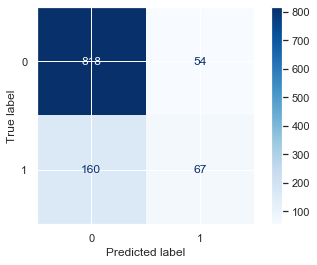

In [99]:
plot_confusion_matrix(logreg, pf_data_test,y_test,cmap=plt.cm.Blues, # Changing the color scheme
                      values_format=".3g")

In [100]:
metrics = {"Accuracy": accuracy_score,
           "Recall": recall_score,
           "Precision": precision_score,
           "F1-Score": f1_score}

for name, metric_function in metrics.items():
    print(f"{name}:"); print("="*len(name))
    print(f"TRAIN: {metric_function(y_train,y_pred_train):.4f}")
    print(f"TEST: {metric_function(y_test, y_pred_test):.4f}")
    print("*" * 15)

Accuracy:
TRAIN: 0.8354
TEST: 0.8053
***************
Recall:
TRAIN: 0.2911
TEST: 0.2952
***************
Precision:
TRAIN: 0.6561
TEST: 0.5537
***************
F1-Score:
TRAIN: 0.4033
TEST: 0.3851
***************


## Part 7: What drives churn?

## Part 8: What are your recommendations?